In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import glob
import os

from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import MultiNiftiLabelsMasker
from nilearn.maskers import MultiNiftiMasker


path = 'data/'

In [24]:

imgs_paths = glob.glob(path + 'prep_000*.nii')
print(imgs_paths)
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois = 400,resolution_mm = 2)
connectome_measure = ConnectivityMeasure(kind = 'correlation')
masker = MultiNiftiLabelsMasker(labels_img = schaefer['maps'], standardize= True, memory='nilearn_cache', n_jobs = -1)
time_series = masker.fit_transform(imgs_paths)

['data/prep_0008.nii', 'data/prep_0005.nii', 'data/prep_0003.nii', 'data/prep_0006.nii', 'data/prep_0002.nii', 'data/prep_0004.nii', 'data/prep_0001.nii', 'data/prep_0007.nii']


 ...done. (0 seconds, 0 min)
/kyb/agks/sheczko/.local/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:617: UserWarning: Persisting input arguments took 0.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(
/kyb/agks/sheczko/.local/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:617: UserWarning: Persisting input arguments took 0.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib'

In [25]:
correlation_matrices = connectome_measure.fit_transform(time_series)

In [26]:
mean_ = connectome_measure.mean_
coords = plotting.find_parcellation_cut_coords(labels_img = schaefer['maps'])

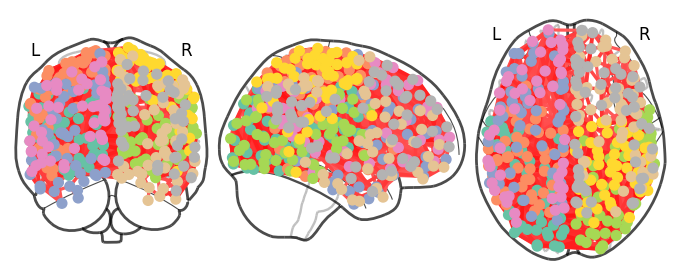

In [27]:
plotting.plot_connectome(mean_, coords, edge_threshold = '95%')

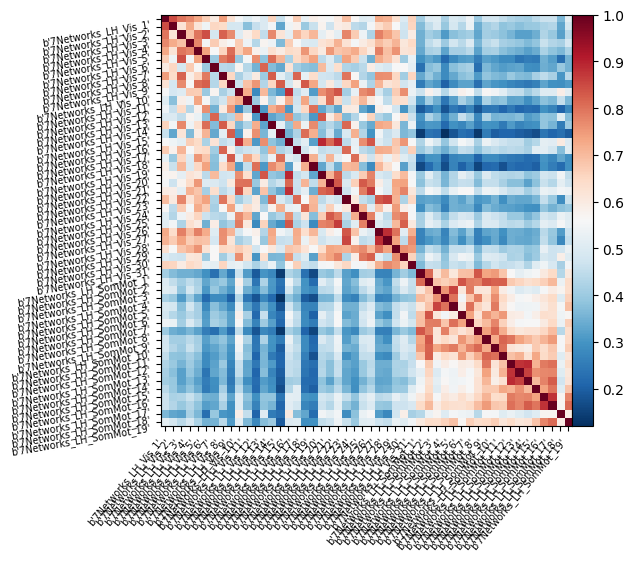

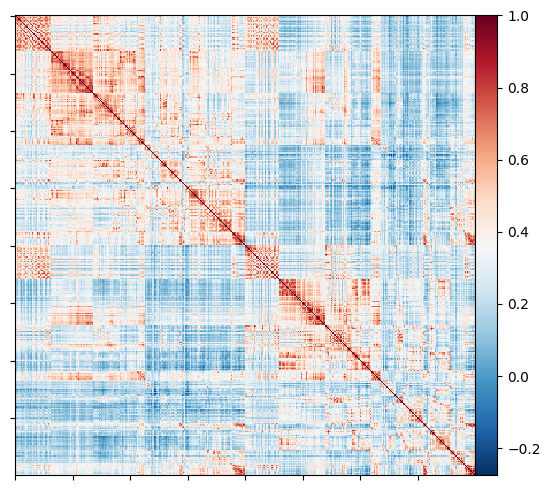

In [28]:
plotting.plot_matrix(mean_[:50,:50],labels = schaefer['labels'][:50])
plotting.show()
plotting.plot_matrix(mean_)


In [29]:
plotting.view_connectome(mean_, coords, edge_threshold = '95%')